## Imports

In [2]:
pip install pandas



SyntaxError: ignored

In [3]:
pip install xgboost

In [4]:

#Import
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
from datetime import datetime
from datetime import timedelta


import seaborn
import sys, pickle
from sklearn                    import preprocessing,metrics,linear_model
from sklearn.model_selection    import cross_val_score,cross_val_predict,train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble           import RandomForestRegressor
from sklearn.ensemble           import ExtraTreesRegressor
from sklearn.model_selection    import GridSearchCV
from sklearn.metrics            import r2_score
from xgboost                    import XGBRegressor
from xgboost                    import XGBClassifier
from sklearn.metrics            import accuracy_score

from sklearn.preprocessing      import StandardScaler
from sklearn.linear_model       import LinearRegression
from sklearn.metrics            import mean_squared_error
from pandas.plotting            import scatter_matrix
from sklearn.decomposition      import PCA
from sklearn.tree               import DecisionTreeRegressor
from sklearn.preprocessing      import MinMaxScaler
from sklearn.preprocessing      import FunctionTransformer
from sklearn.linear_model       import ElasticNet
from sklearn.model_selection    import TimeSeriesSplit


## Loading the dataset

In [7]:
seoulbikedata = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv", encoding= "unicode_escape")
seoulbikedata

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


##First Analysis

In [8]:
seoulbikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
seoulbikedata.tail()

seoulbikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
row, col = seoulbikedata.shape
print(row)
print(col)

8760
14


In [11]:
seoulbikedata.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

8760 data and 14 features.

#### Data Types :


In [15]:
seoulbikedata.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

## Data Cleaning 

In [14]:
#copy the data
df = seoulbikedata
df1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv", encoding= "unicode_escape")

There is no inexistent information.

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [17]:
df1.isna()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Data Types Convert**   


In [18]:
df1.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [19]:
df1['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df1['Holiday'] = df1['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)
df1['Functioning Day'] = df1['Functioning Day'].apply(lambda x: 0 if x == 'No' else 1)

df1['Day']=pd.DatetimeIndex(df1['Date']).day
df1['Year']=pd.DatetimeIndex(df1['Date']).year

In [ ]:
df1.head(10)

## Data Visualization 

**Heat map**

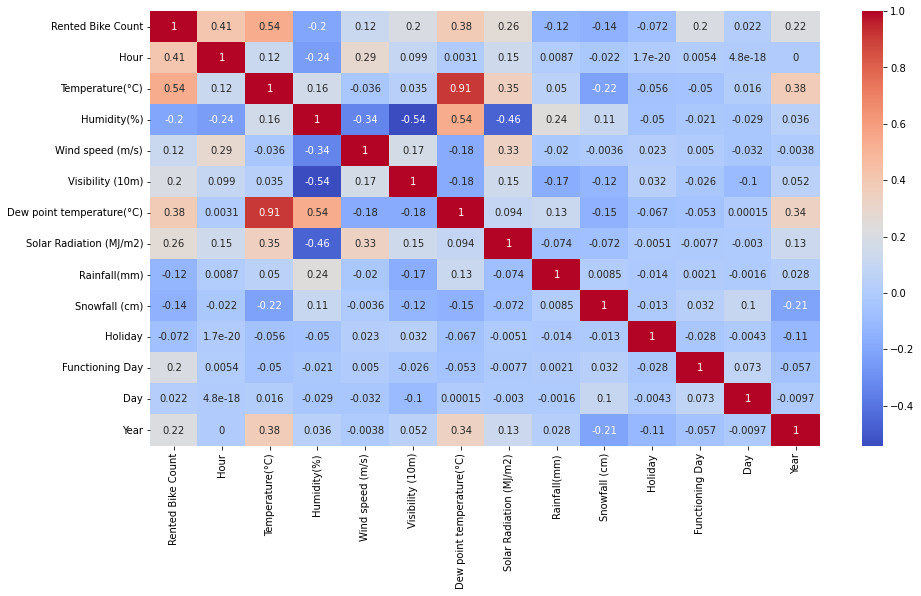

In [26]:
plt.figure(figsize=(15,8))
correlation = df1.corr()
seaborn.heatmap(correlation, annot=True, cmap='coolwarm')


Features Temperature and Dew Point Temperature are extremaly correlated

### Seasonly Visualization

Text(0.5, 1.0, 'Repartition of bike rental by season')

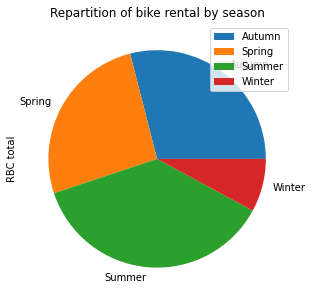

In [27]:
seasons =  df1.groupby(['Seasons']).mean()
seasons2 = pd.pivot_table(df1,values='Rented Bike Count',index='Seasons',aggfunc=sum)
seasons['RBC total'] = seasons2['Rented Bike Count']
seasons

seasons.plot.pie(y='RBC total',figsize=(10, 5))
plt.title("Repartition of bike rental by season")

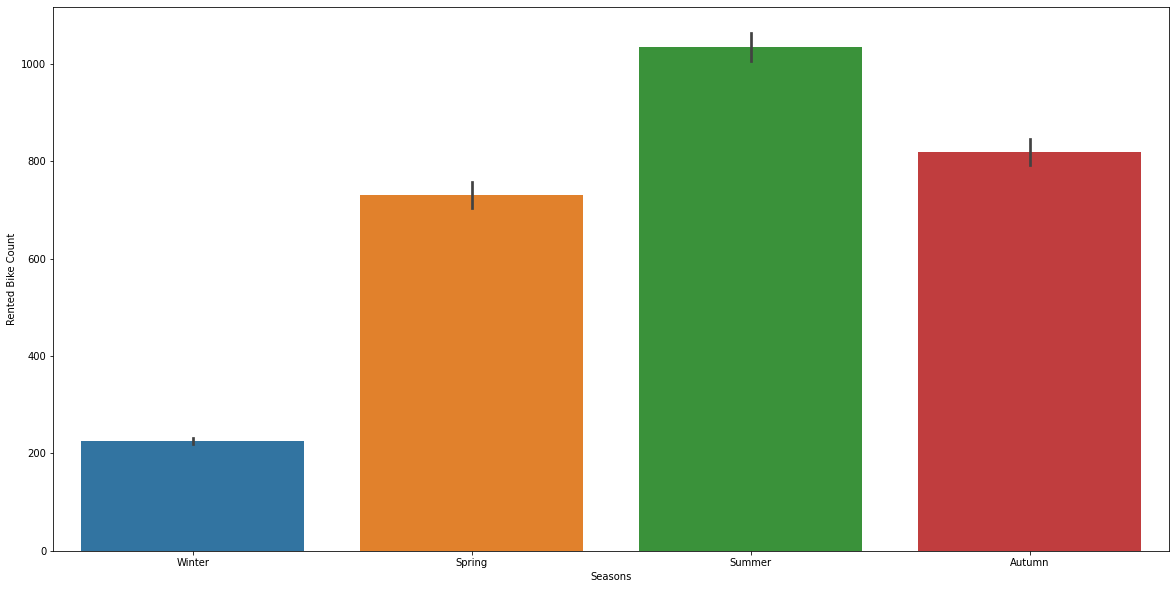

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
seaborn.barplot(data=df1, x='Seasons', y='Rented Bike Count')

The number of bike rentals is much higher in summer and autumn, when temperatures are warmer. Temperatures seem to have an influence on bike rental in Seoul

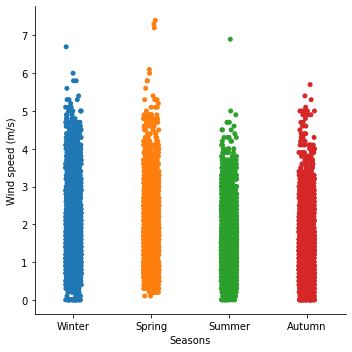

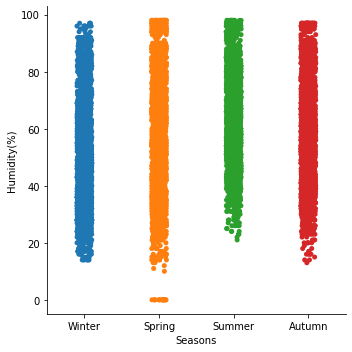

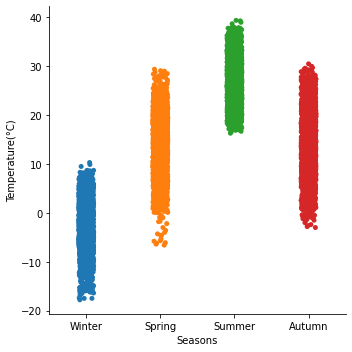

In [29]:
fig.suptitle('Seasons Vs Meteo')
seaborn.catplot(data=df1, x='Seasons', y='Wind speed (m/s)')
seaborn.catplot(data=df1, x='Seasons', y='Humidity(%)')
seaborn.catplot(data=df1, x='Seasons', y='Temperature(°C)')



**Seasons's Rental by Holiday**

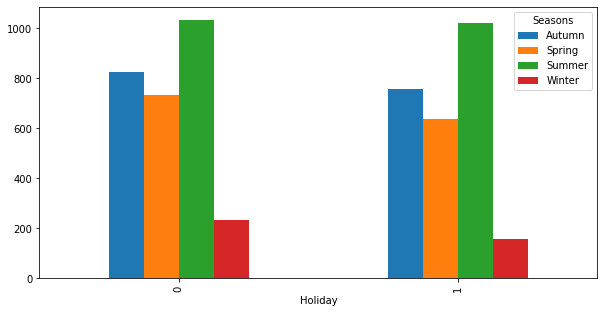

In [30]:
season_holiday = pd.pivot_table(df1,values='Rented Bike Count',index='Holiday',columns='Seasons',aggfunc=np.mean)
season_holiday.plot.bar(figsize=(10,5))

### Monthly Visualization

**Rentals per month**

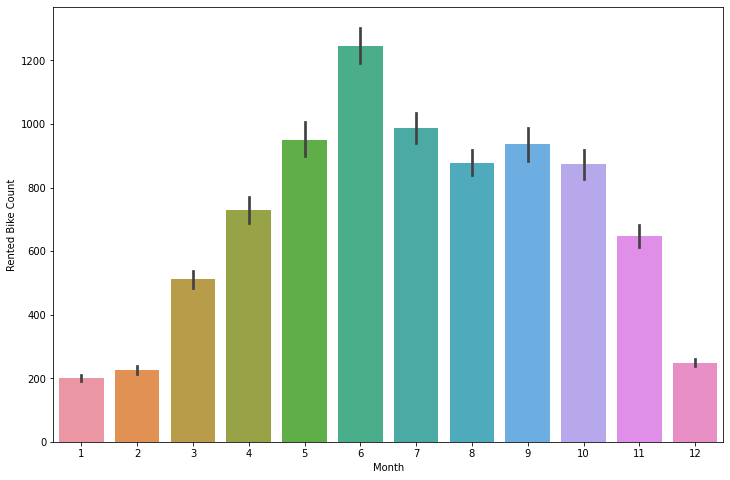

In [35]:
df1['Month']=pd.DatetimeIndex(df1['Date']).month
fig, ax = plt.subplots(figsize=(12,8))
seaborn.barplot(data=df1, x='Month', y='Rented Bike Count')



The bike rentals are highter during the summer period and the months when the temperatures are hot.


**Month vs Meteo**

In [ ]:
temp1 = df1[['Temperature(°C)','Humidity(%)',
                      'Wind speed (m/s)','Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                     'Rainfall(mm)','Snowfall (cm)']]


temp2 = pd.pivot_table(df1,values='Rented Bike Count',index='Solar Radiation (MJ/m2)',aggfunc= np.mean)
temp2.plot(figsize=(15,8),style='r8')

temp2 = pd.pivot_table(df1,values='Rented Bike Count',index='Wind speed (m/s)',aggfunc= np.mean)
temp2.plot(figsize=(15,8),style='r8')

temp2 = pd.pivot_table(df1,values='Rented Bike Count',index='Temperature(°C)',aggfunc= np.mean)
temp2.plot(figsize=(15,8),style='rs')

temp2 = pd.pivot_table(df1,values='Rented Bike Count',index='Visibility (10m)',aggfunc= np.mean)
temp2.plot(figsize=(15,8),style='ro')

temp2 = pd.pivot_table(df1,values='Rented Bike Count',index='Rainfall(mm)',aggfunc= np.mean)
temp2.plot(figsize=(15,8),style='ro')



**Month vs Functioning Day**

In [ ]:
MonthvsF = pd.pivot_table(df1,values='Rented Bike Count',index='Functioning Day',columns='Month',aggfunc=np.mean)
MonthvsF.plot.bar(figsize=(10,5))

### Daily Visualization

**Rented bike per day in one month and in one week.**

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
seaborn.barplot(data=df1, x='Day', y='Rented Bike Count')

#1 januar 2017 is a Friday !!
dates = pd.to_datetime(df1['Date'], dayfirst=True)
df1['Day'] = [dates[i].day_name() for i in range(len(dates))]
fig, ax = plt.subplots(1,1, figsize=(10,5))
seaborn.barplot(x='Day', y='Rented Bike Count', data=df1)

**Day vs Holiday**

In [39]:
Holiday = pd.DataFrame(df1['Holiday'])
Holiday['Rented Bike Count']=df1['Rented Bike Count']


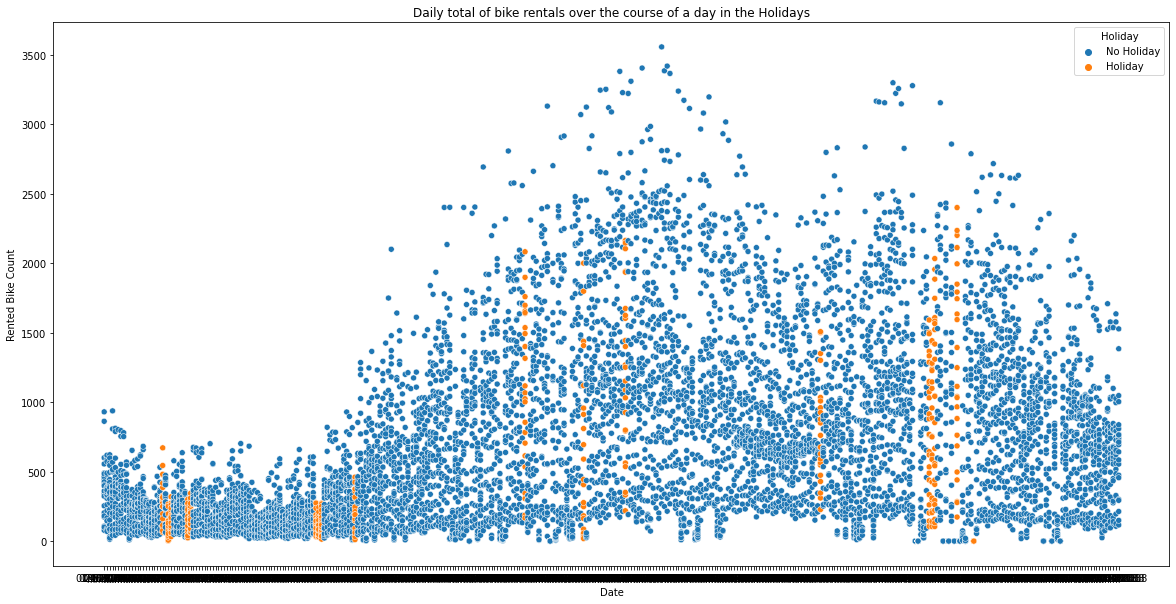

In [40]:
plt.figure(figsize=(20,10))
seaborn.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Holiday")
plt.title("Daily total of bike rentals over the course of a day in the Holidays")
plt.show()

Holiday feature seems to not affect the daily mean of rentals.

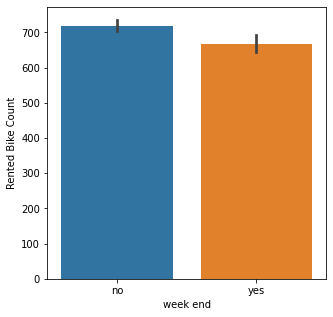

In [41]:
df1['week end'] = [ 'yes' if df1.iloc[i]['Day'] in ('Saturday','Sunday') else 'no'  for i in range(len(df1))]
fig, ax = plt.subplots(figsize=(5,5))
seaborn.barplot(data=df1, x='week end', y='Rented Bike Count')

### Hourly Visualization

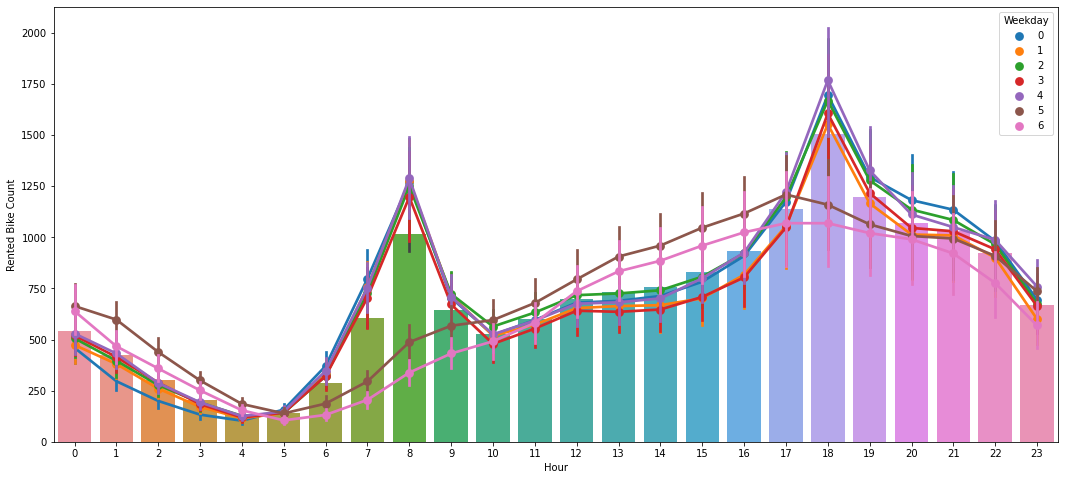

<Figure size 1296x576 with 0 Axes>

In [44]:
df1['Weekday']=pd.DatetimeIndex(df1['Date']).dayofweek
fig, ax = plt.subplots(figsize=(18,8))
seaborn.pointplot(data=df1, x = "Hour", y = "Rented Bike Count", hue = "Weekday", join = True)

seaborn.barplot(data=df, x='Hour', y='Rented Bike Count')
plt.figure(figsize=(18,8))
plt.show()

During peak hours the rentals are more important. It can be assumed that bike rentals are more in demand for business trips and to get to school.  

The peak hours is on Friday 6 o'clock

## First data processing

Raw Data Processing, just to make it usable.

In [ ]:
df1.corr()

*Temperature(°C)* and *Dew point temperature(°C)* are almost completely correlated. 
So we drop the dew point temperature feature.

In [ ]:
#HeatMap
plt.figure(figsize=(15,8))
correlation = df1.corr()
seaborn.heatmap(correlation, annot=True, cmap='coolwarm')


In [ ]:
#Drop "Dew Piont Features"
#df1=df1.drop(["Dew point temperature(°C)"], axis=1)
df1.dtypes

**ReConvert**

In [ ]:

df1['Seasons'] = df1['Seasons'].apply(lambda x: 1 if x == 'Winter' else 2 if x == 'Spring' else 3 if x == 'Summer' else 4)
df1['Holiday'] = df1['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)
df1['Functioning Day'] = df1['Functioning Day'].apply(lambda x: 0 if x == 'No' else 1)

df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].map(dt.datetime.toordinal)
df1['Date']

**Column selection**

In [26]:

X = np.concatenate((df1.iloc[:, [0]].values, df1.iloc[:, 2:].values), axis=1)
Y = df1.iloc[:, [1]].values



## Modelling

**Train and Set**

In [27]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


### Scaling

In [28]:
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Regression
-Linear Regression

-Tree Regression

In [24]:
lr = LinearRegression().fit(X_train, Y_train)
lr.coef_
Y_prediction = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
score = r2_score(Y_test, Y_prediction)


print(mean_squared_error(Y_test, Y_prediction))
print(np.sqrt(mean_squared_error(Y_test, Y_prediction)))
print(score)

190519.50560552508
436.48540136587053
0.5432389012583414


Tree Regression 

In [25]:

regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, Y_train)

Y_prediction = regr.predict(X_test)

from sklearn.metrics import mean_squared_error
score = r2_score(Y_test, Y_prediction)

print(mean_squared_error(Y_test, Y_prediction))
print(np.sqrt(mean_squared_error(Y_test, Y_prediction)))
print(score)

80239.15073611132
283.26515976397684
0.8076306017284725


### Random Forest

In [26]:
regr = RandomForestRegressor(max_depth=12, random_state=0).fit(X_train, Y_train)
Y_prediction = regr.predict(X_test)
score = r2_score(Y_test, Y_prediction)

print(mean_squared_error(Y_test, Y_prediction))
print(np.sqrt(mean_squared_error(Y_test, Y_prediction)))
print(score)

54499.90938463584
233.45215652170754
0.8693391607713411


### XGBoost 

XGB CLASSIFIER

XGB REGRESSOR

In [ ]:

model1 = XGBRegressor()
params = {  "max_depth" : [1, 5, 10, 60, 70, 80, 90, 100],
            "gamma"     : [0.5, 1, 1.1, 1.2, 1.5]   }
          
grid   = GridSearchCV(model1, params, scoring='r2')
grid.fit(X_train, Y_train)
print(grid.best_score_)


In [44]:
X1,Y1 = df1.iloc[:,:-1],df1.iloc[:,-1]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=123)

# fit model no training data ! 
model = XGBClassifier()
model.fit(X1_train, Y1_train)

# make predictions for test data
y_pred = model.predict(X1_test)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(Y1_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 100.00%
